<a href="https://colab.research.google.com/github/MuhammadAwon/backyard-projects/blob/main/intro-to-deep-learning/transfer_learning_feature_extraction/04_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠 Exercises

1. Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction ([`mobilenet_v2_100_224/feature_vector`](https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4)) from TensorFlow Hub, how does it perform compared to our other models?

In [ ]:
import zipfile
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import random
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Check gpu
!nvidia-smi

Mon Nov 22 05:00:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Download data
!wget # Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.
--2021-11-22 05:00:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 74.125.202.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   168MB/s    in 1.0s    

2021-11-22 05:00:15 (168 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Unzip data
ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
ref.extractall()
ref.close()

In [ ]:
# Walk through root directory
for root, dirs, files in os.walk('/content/10_food_classes_10_percent'):
  print(f'there are {len(dirs)} directories and {len(files)} files in path {root}')

there are 2 directories and 0 files in path /content/10_food_classes_10_percent
there are 10 directories and 0 files in path /content/10_food_classes_10_percent/train
there are 0 directories and 75 files in path /content/10_food_classes_10_percent/train/chicken_curry
there are 0 directories and 75 files in path /content/10_food_classes_10_percent/train/pizza
there are 0 directories and 75 files in path /content/10_food_classes_10_percent/train/ice_cream
there are 0 directories and 75 files in path /content/10_food_classes_10_percent/train/ramen
there are 0 directories and 75 files in path /content/10_food_classes_10_percent/train/fried_rice
there are 0 directories and 75 files in path /content/10_food_classes_10_percent/train/grilled_salmon
there are 0 directories and 75 files in path /content/10_food_classes_10_percent/train/sushi
there are 0 directories and 75 files in path /content/10_food_classes_10_percent/train/hamburger
there are 0 directories and 75 files in path /content/10_fo

In [ ]:
# Get class names
class_dir = pathlib.Path('/content/10_food_classes_10_percent/train/')
multi_class_names = np.array(sorted(item.name for item in class_dir.glob('*')))
print(multi_class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Function to plot random image
def plot_random_image(target_dir, target_class):
  target_folder = target_dir + '/' + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  filename = target_folder + '/' + random_image[0]
  img = mpimg.imread(filename)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  return img

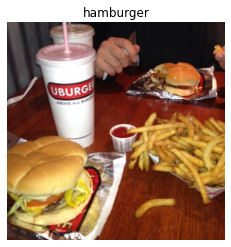

In [ ]:
img = plot_random_image(target_dir='/content/10_food_classes_10_percent/train/',
                  target_class='hamburger')

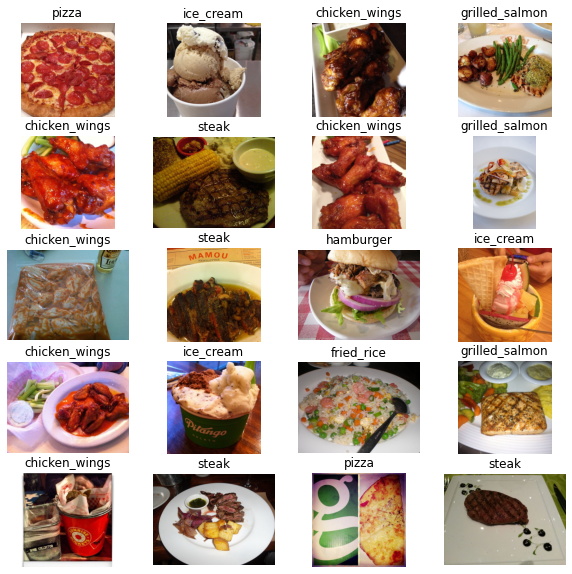

In [ ]:
# Visualize random images from all 10 classes
fig = plt.figure(figsize=(10,10))
columns = 4
rows = 5
for i in range(1, columns*rows+1):
  fig.add_subplot(rows, columns, i)
  img = plot_random_image(target_dir='/content/10_food_classes_10_percent/train',
                          target_class=random.choice(multi_class_names))

In [ ]:
img, img.shape

(array([[[ 85,  92,  14],
         [ 85,  92,  12],
         [ 89,  93,  16],
         ...,
         [ 94,  95,  25],
         [ 93,  94,  26],
         [ 89,  90,  22]],
 
        [[ 87,  94,  16],
         [ 87,  94,  16],
         [ 87,  94,  16],
         ...,
         [ 89,  90,  22],
         [ 88,  89,  21],
         [ 85,  86,  18]],
 
        [[ 88,  95,  18],
         [ 88,  95,  17],
         [ 86,  93,  15],
         ...,
         [ 94,  95,  27],
         [ 94,  95,  27],
         [ 90,  91,  23]],
 
        ...,
 
        [[148, 151, 130],
         [147, 150, 129],
         [147, 150, 129],
         ...,
         [191, 179, 165],
         [191, 179, 165],
         [190, 178, 164]],
 
        [[146, 149, 128],
         [144, 147, 126],
         [144, 147, 126],
         ...,
         [191, 179, 165],
         [190, 178, 164],
         [190, 178, 164]],
 
        [[145, 148, 127],
         [142, 145, 124],
         [142, 145, 124],
         ...,
         [190, 178, 164],
  

In [ ]:
# Load in image data
IMG_SHAPE = (224,224)

# Setup train & test directories
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

# Create data generator & rescale iamges
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup train & test set
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SHAPE,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                          target_size=IMG_SHAPE,
                                          class_mode='categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Download MobileNetV2 feature vector model
mobilenet_url = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5'

In [ ]:
# Download pretrained model and save it as keras layer
feature_extractor_layer = hub.KerasLayer(mobilenet_url,
                                         trainable=False,
                                         name='feature_extraction_layer',
                                         input_shape=IMG_SHAPE+(3,))

# Create our own model
mobilenet_model = tf.keras.Sequential([
        feature_extractor_layer,
        layers.Dense(train_data.num_classes,
                     activation='softmax',
                     name='output_layer')
])

In [ ]:
# Model summary
mobilenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             2257984   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Compile
mobilenet_model.compile(loss='categorical_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['accuracy'])

In [ ]:
# Fit the model
mobilenet_history = mobilenet_model.fit(train_data,
                                        epochs=5,
                                        steps_per_epoch=len(train_data),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 52s 850ms/step - loss: 1.9059 - accuracy: 0.3547 - val_loss: 1.2947 - val_accuracy: 0.6188
Epoch 2/5
24/24 [==============================] - 18s 772ms/step - loss: 1.0145 - accuracy: 0.7280 - val_loss: 0.8632 - val_accuracy: 0.7480
Epoch 3/5
24/24 [==============================] - 18s 763ms/step - loss: 0.7154 - accuracy: 0.8027 - val_loss: 0.7396 - val_accuracy: 0.7816
Epoch 4/5
24/24 [==============================] - 18s 781ms/step - loss: 0.5725 - accuracy: 0.8400 - val_loss: 0.6884 - val_accuracy: 0.7844
Epoch 5/5
24/24 [==============================] - 18s 784ms/step - loss: 0.4796 - accuracy: 0.8773 - val_loss: 0.6441 - val_accuracy: 0.7992


In [ ]:
# Plot the validation and training history separately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(loss))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

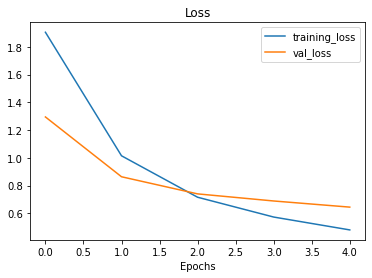

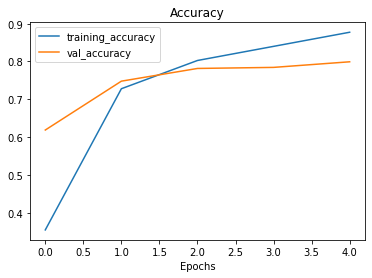

In [ ]:
plot_loss_curves(mobilenet_history)

2. Name 3 different image classification models on TensorFlow Hub that we haven't used.

* regnety
* xception
* imagenet/nasnet

3. Build a model to classify images of two different things you've taken photos of.
  * You can use any feature extraction layer from TensorFlow Hub you like for this.
  * You should aim to have at least 10 images of each class, for example to build a fridge versus oven classifier, you'll want 10 images of fridges and 10 images of ovens.

In [ ]:
# Walk throught directory
for root, dirs, files in os.walk('/content/drive/MyDrive/Colab Notebooks/intro-to-deep-learning/transfer_learning_feature_extraction/universe_dataset'):
  print(f'Number of directories are {len(dirs)} and files are {len(files)} in path {root}')

Number of directories are 2 and files are 0 in path /content/drive/MyDrive/Colab Notebooks/intro-to-deep-learning/transfer_learning_feature_extraction/universe_dataset
Number of directories are 0 and files are 10 in path /content/drive/MyDrive/Colab Notebooks/intro-to-deep-learning/transfer_learning_feature_extraction/universe_dataset/moon
Number of directories are 0 and files are 10 in path /content/drive/MyDrive/Colab Notebooks/intro-to-deep-learning/transfer_learning_feature_extraction/universe_dataset/sun


In [ ]:
# Get class names
class_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/intro-to-deep-learning/transfer_learning_feature_extraction/universe_dataset')
class_names = np.array(sorted([item.name for item in class_dir.glob('*')]))
class_names

array(['moon', 'sun'], dtype='<U4')

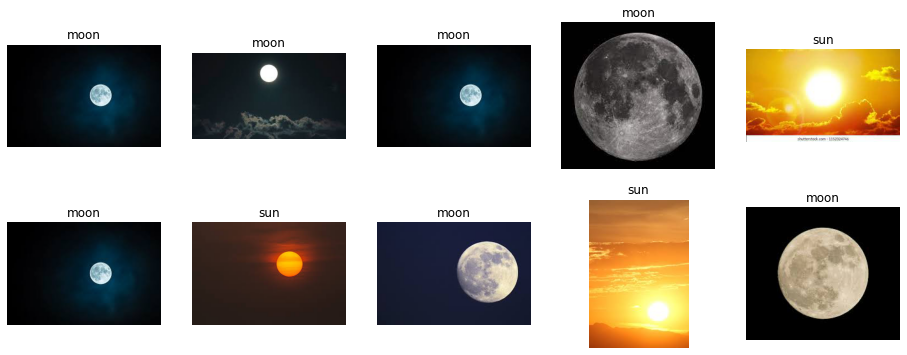

In [ ]:
# Visualize random images from all 10 classes
fig = plt.figure(figsize=(16,6))
columns = 5
rows = 2
for i in range(1, columns*rows+1):
  fig.add_subplot(rows, columns, i)
  img = plot_random_image(target_dir='/content/drive/MyDrive/Colab Notebooks/intro-to-deep-learning/transfer_learning_feature_extraction/universe_dataset',
                          target_class=random.choice(class_names))

In [ ]:
# Check image shape
img.shape

(209, 241, 3)

In [ ]:
# Load data
train_dir = '/content/drive/MyDrive/Colab Notebooks/intro-to-deep-learning/transfer_learning_feature_extraction/universe_dataset'

IMG_SIZE = (224,224)
BATCH_SIZE = 8

train_datagen = ImageDataGenerator(rescale=1/225.)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='binary')

Found 20 images belonging to 2 classes.


In [ ]:
images, labels = next(train_data)

# Check shape of first image and label
images[0].shape, labels[0].shape

((224, 224, 3), ())

In [ ]:
# Build model with feature extractor layer that we built earlier
binary_mobilenet = tf.keras.Sequential([
        feature_extractor_layer,
        layers.Dense(1, activation='sigmoid', name='output_layer')
])

In [ ]:
# Check model summary
binary_mobilenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             2257984   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Compile
binary_mobilenet.compile(loss='binary_crossentropy',
                         optimizer=tf.keras.optimizers.Adam(0.0001),
                         metrics=['accuracy'])

In [ ]:
# Fit
binary_mobilenet_history = binary_mobilenet.fit(train_data,
                                                epochs=15)

Epoch 1/15
3/3 [==============================] - 3s 791ms/step - loss: 1.0964 - accuracy: 0.4500
Epoch 2/15
3/3 [==============================] - 0s 43ms/step - loss: 1.0562 - accuracy: 0.4500
Epoch 3/15
3/3 [==============================] - 0s 31ms/step - loss: 1.0235 - accuracy: 0.4500
Epoch 4/15
3/3 [==============================] - 0s 33ms/step - loss: 0.9875 - accuracy: 0.4500
Epoch 5/15
3/3 [==============================] - 0s 35ms/step - loss: 0.9541 - accuracy: 0.4500
Epoch 6/15
3/3 [==============================] - 0s 36ms/step - loss: 0.9242 - accuracy: 0.5000
Epoch 7/15
3/3 [==============================] - 0s 29ms/step - loss: 0.8969 - accuracy: 0.5000
Epoch 8/15
3/3 [==============================] - 0s 35ms/step - loss: 0.8610 - accuracy: 0.5000
Epoch 9/15
3/3 [==============================] - 0s 28ms/step - loss: 0.8408 - accuracy: 0.5000
Epoch 10/15
3/3 [==============================] - 0s 32ms/step - loss: 0.8089 - accuracy: 0.5000
Epoch 11/15
3/3 [===========

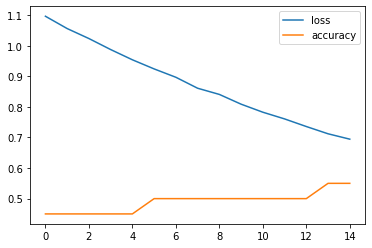

In [ ]:
# Check loss curves
import pandas as pd 

pd.DataFrame(binary_mobilenet_history.history).plot()

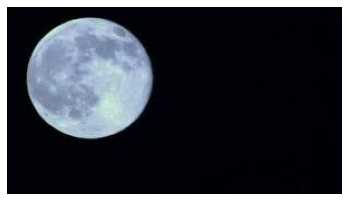

In [ ]:
# Import an evaluation image
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/intro-to-deep-learning/transfer_learning_feature_extraction/evaluation_images/emoon1.jpg')
plt.imshow(img)
plt.axis('off');

In [ ]:
# Create function to import an image and resize it to be used for our trained model
def load_and_prep_image(filename, img_size=224):
  # Read in the target image
  img = tf.io.read_file(filename)
  # Decode image into a tensor
  img = tf.image.decode_image(img, channels=3)
  # Resize the image (same size as the model trained on)
  img = tf.image.resize(img, size=[img_size, img_size])
  # Rescale the image
  img = img/225.

  return img

In [ ]:
# Get all the images filepath
first_moon = '/content/drive/MyDrive/Colab Notebooks/intro-to-deep-learning/transfer_learning_feature_extraction/evaluation_images/emoon1.jpg'
second_moon = '/content/drive/MyDrive/Colab Notebooks/intro-to-deep-learning/transfer_learning_feature_extraction/evaluation_images/emoon2.jpg'
first_sun = '/content/drive/MyDrive/Colab Notebooks/intro-to-deep-learning/transfer_learning_feature_extraction/evaluation_images/esun1.jpg'
second_sun = '/content/drive/MyDrive/Colab Notebooks/intro-to-deep-learning/transfer_learning_feature_extraction/evaluation_images/esun2.jpg'

In [ ]:
# Load and prep second_moon image
img = load_and_prep_image(second_moon)

In [ ]:
# Image needs to be 4D (same shape as model was trained on)
tf.expand_dims(img, axis=0).shape

TensorShape([1, 224, 224, 3])

In [ ]:
# Make predictions
pred = binary_mobilenet.predict(tf.expand_dims(img, axis=0))
pred

array([[0.61947477]], dtype=float32)

In [ ]:
# Check class name
class_names[int(tf.round(pred)[0][0])]

'sun'

In [ ]:
# Create function to make prediction and display it
def pred_and_plot(model, filename, class_names):
  # Import target image and preprocess it
  img = load_and_prep_image(filename)
  # Make predictions
  pred = model.predict(tf.expand_dims(img, axis=0))
  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis('off')

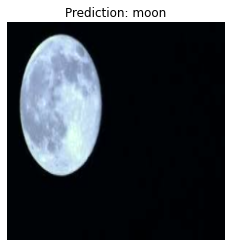

In [ ]:
# Predict first_moon image
pred_and_plot(model=binary_mobilenet,
              filename=first_moon,
              class_names=class_names)

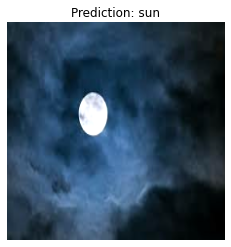

In [ ]:
# Predict second_moon image
pred_and_plot(model=binary_mobilenet,
              filename=second_moon,
              class_names=class_names)

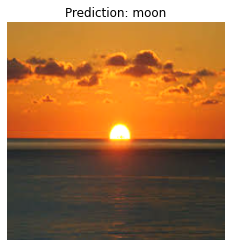

In [ ]:
# Predict first_sun image
pred_and_plot(model=binary_mobilenet,
              filename=first_sun,
              class_names=class_names)

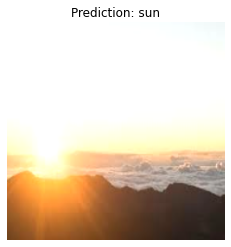

In [ ]:
# Predict second_sun image
pred_and_plot(model=binary_mobilenet,
              filename=second_sun,
              class_names=class_names)

The model has 50% prediction accuracy.

4. What is the current best performing model on ImageNet?
  * Hint: you might want to check [sotabench.com](https://www.sotabench.com) for this. 

## 📖 Extra-curriculum

* Read through the [TensorFlow Transfer Learning Guide](https://www.tensorflow.org/tutorials/images/transfer_learning) and define the main two types of transfer learning in your own words.

Instead of building a Convolutional Network from scratch, you can use transfer learning from a pre-trained network.

The intuition behind transfer learning for image classification is that if a model is trained on a large dataset and is generalized enough, this model can be reliable to use for any custom image classification problem. You can leverage the transfer learning technique on a pre-trained model as it has already feature maps.

There are two types of transfer learning you can apply to the pre-trained model:
* **Feature Extraction**: Use the representations learned by a pre-trained network to extract useful features from new samples. For training, you add a new classifier on top of the pre-trained model and repurpose the feature maps learned previously for the dataset. But you don't train the entire model. The base convolutional network already contains features that are useful for classifying images. However, the final part of the pre-trained model is specific to the original classification task and specific to the set of classes on which the model was trained initially, so you want to tweak the final part according to your problem.
  * **Using a pre-trained model for feature extraction**: A common practice working with small dataset is to take advantage of features learned by a model trained on a larger dataset in the same domain. This is done by instantiating the pre-trained model and adding a fully-connected classifier on top. The pre-trained model is "frozen" and only the weights of the classifier get updated during training. In this case, the base model extracted all the features associated with each image and you just trained a classfier that determines the image class given that set of extracted features.
* **Fine-Tuning**: Unfreeze a few top layers of pre-trained model and train with newly-added classifier layers. This allows to fine-tune the higher-order feature representations in the base model to make them more relevant for the specific task.
  * **Fine-tuning a pre-trained model**: You may want to repurpose the top-level layers of the pre-trained models to the new dataset via fine-tuning to further improve performance. In this case, you tuned your weights such that your model learned high-level features specific to the dataset. This technique is usually recommended when the training dataset is large and very similar to the original dataset that the pre-trained model was trained on.

* Go through the [Transfer Learning with TensorFlow Hub tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub) on the TensorFlow website and rewrite all of the code yourself into a new Google Colab notebook making comments about what each step does along the way.

  [Transfer learning with TensorFlow Hub Notebook](https://colab.research.google.com/drive/1MoFX1r05X95Mt3WzAV2N4TVAZ492DB8V?usp=sharing)

* We haven't covered fine-tuning with TensorFlow Hub in this notebook, but if you'd like to know more, go through the [fine-tuning a TensorFlow Hub model tutorial](https://www.tensorflow.org/hub/tf2_saved_model#fine-tuning) on the TensorFlow homepage. How to fine-tune a tensorflow hub model:

  * **Fine-Tuning**

    Training the already-trained variables of an imported SavedModel together with those of the model around it is called *fine-tuning* the SavedModel. This can result in better quality, but often makes the training more demanding (may take more time, depend more on the optimizer and its hyperparameters, increase the risk of overfitting and require dataset augmentation, esp. for CNNs). We advise SavedModel consumers to look into fine-tuning only after having established a good training regime, and only if the SavedModel publisher recommends it.

    Fine-tuning changes the "continuous" model parameters that are trained. It does not changed hard-coded transformations, such as tokenizing text input and mapping tokens to their corresponding entries in an embedding matrix.

  * *For SavedModel consumers*

    Creating a [hub.KerasLayer](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer) like

In [ ]:
layer = hub.KerasLayer(..., trainable=True)

enables fine-tuning of the SavedModel loaded by the layer. It adds the trainable weights and weight regularizers declared in the SavedModel to the Keras model, and runs the SavedModel's computation in training mode (think of dropout etc.).

The [image classfication colab](https://colab.research.google.com/drive/1_0vM_i7UUe_GZzBR6SWOkTZ8Un6xm1yI?usp=sharing) contains an end-to-end example with optional fine-tuning.

* Look into [experiment tracking with Weights & Biases](https://www.wandb.com/experiment-tracking), how could you integrate it with our existing TensorBoard logs?

[See the implementation here](https://colab.research.google.com/drive/1MoFX1r05X95Mt3WzAV2N4TVAZ492DB8V?usp=sharing)